# Cluster Analysis

The following tutorial contains Python examples for cluster analysis. Follow the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT+ENTER keys simultaneously.

**Cluster analysis** aims to partition input data into closely related groups of instances, so that instances belonging to the same cluster are more similar to each other than instances belonging to other clusters. In this tutorial, we will provide examples using different clustering techniques from the scikit-learn library package.

## Importing Libraries and Configuration

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams

## Settings

In [66]:
# Set the default figure size for matplotlib plots to 15 inches wide by 6 inches tall
rcParams["figure.figsize"] = (15, 6)

# Increase the default font size of the titles in matplotlib plots to extra-extra-large
rcParams["axes.titlesize"] = "xx-large"

# Make the titles of axes in matplotlib plots bold for better visibility
rcParams["axes.titleweight"] = "bold"

# Set the default location of the legend in matplotlib plots to the upper left corner
rcParams["legend.loc"] = "upper left"

# Configure pandas to display all columns of a DataFrame when printed to the console
pd.set_option('display.max_columns', None)

# Configure pandas to display all rows of a DataFrame when printed to the console
pd.set_option('display.max_rows', None)

## Load the dataset

In [67]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
data.columns = feature_names+['class']
# Mapping from class to label
class_to_label = {
    "Iris-setosa": 1,
    "Iris-versicolor": 0,
    "Iris-virginica": 2
}
data["label"] = data["class"].map(class_to_label)
data.head()
display (data.head(n=10))

,sepal length,sepal width,petal length,petal width,class,label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
5,5.4,3.9,1.7,0.4,Iris-setosa,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1
7,5.0,3.4,1.5,0.2,Iris-setosa,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1
9,4.9,3.1,1.5,0.1,Iris-setosa,1


## K-means Clustering

The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm would partition the input data into *k* disjoint clusters by iteratively applying the following two steps:
1. Form *k* clusters by assigning each instance to its nearest centroid.
2. Recompute the centroid of each cluster.

In [68]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
k_means = KMeans(n_clusters=3, max_iter=50, random_state=1)
k_means.fit(data[feature_names])
data["kmeans-label"] = k_means.labels_

data.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal length,sepal width,petal length,petal width,class,label,kmeans-label
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
5,5.4,3.9,1.7,0.4,Iris-setosa,1,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1,1
7,5.0,3.4,1.5,0.2,Iris-setosa,1,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1,1
9,4.9,3.1,1.5,0.1,Iris-setosa,1,1


The following code creates a confusion matrix to visualize the comparison between the true labels and the labels predicted by the K-means clustering algorithm

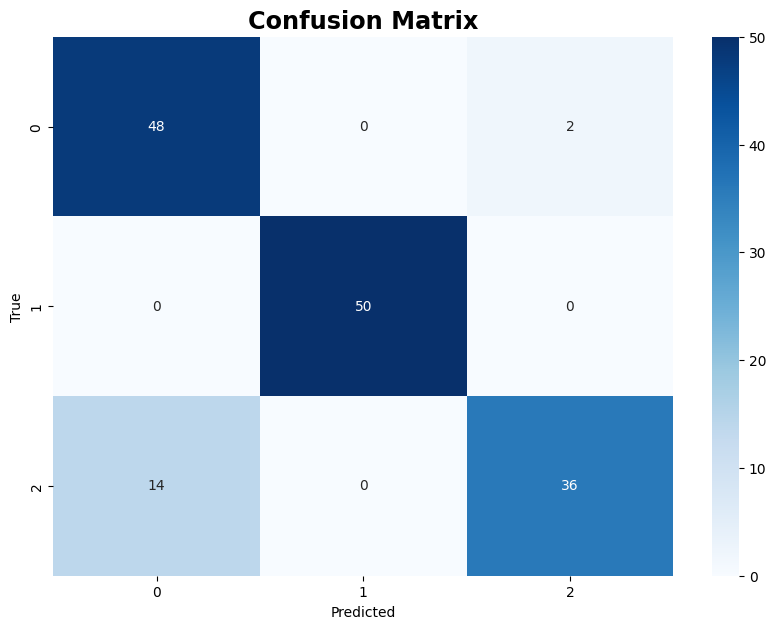

In [69]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(data["label"], data["kmeans-label"])

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


The following code uses the trained Kmeans model to predict labels for two test data samples.

In [70]:
testData = pd.DataFrame([[4, 5, 1, 0.2], [7, 4, 4.1, 3.4]], columns=feature_names)
testData["kmeans-label"] = k_means.predict(testData)
testData

,sepal length,sepal width,petal length,petal width,kmeans-label
0,4,5,1.0,0.2,1
1,7,4,4.1,3.4,2


## Agglomerative clustering

This section demonstrates examples of applying Agglomerative Clustering using different linkage criteria:
- Single Linkage (MIN), where the distance between two clusters is defined as the minimum distance between any two points in the clusters.
- Average Linkage, where the distance between two clusters is the average distance between each point in one cluster to every point in the other cluster.
- Complete Linkage (MAX), where the distance between two clusters is defined as the maximum distance between any two points in the clusters.
- Ward's Method, which minimizes the variance when forming clusters, leading to more compact and equally sized clusters.


In [71]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3, linkage="single")
data["agglo-single-label"] = agglo.fit_predict(data[feature_names])
agglo = AgglomerativeClustering(n_clusters=3, linkage="average")
data["agglo-average-label"] = agglo.fit_predict(data[feature_names])
agglo = AgglomerativeClustering(n_clusters=3, linkage="complete")
data["agglo-complete-label"] = agglo.fit_predict(data[feature_names])
agglo = AgglomerativeClustering(n_clusters=3, linkage="ward")
data["agglo-ward-label"] = agglo.fit_predict(data[feature_names])
data.head(10)


,sepal length,sepal width,petal length,petal width,class,label,kmeans-label,agglo-single-label,agglo-average-label,agglo-complete-label,agglo-ward-label
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1,1,1,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1,1,1,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1,1,1,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1,1,1,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1,1,1,1,1
5,5.4,3.9,1.7,0.4,Iris-setosa,1,1,1,1,1,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1,1,1,1,1,1
7,5.0,3.4,1.5,0.2,Iris-setosa,1,1,1,1,1,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1,1,1,1,1,1
9,4.9,3.1,1.5,0.1,Iris-setosa,1,1,1,1,1,1


The following code generates side-by-side scatter plots to visually compare the actual labels with the clustering results obtained from the KMeans and Agglomerative Clustering. Each plot uses the sepal length and sepal width features for the x and y axes, respectively.

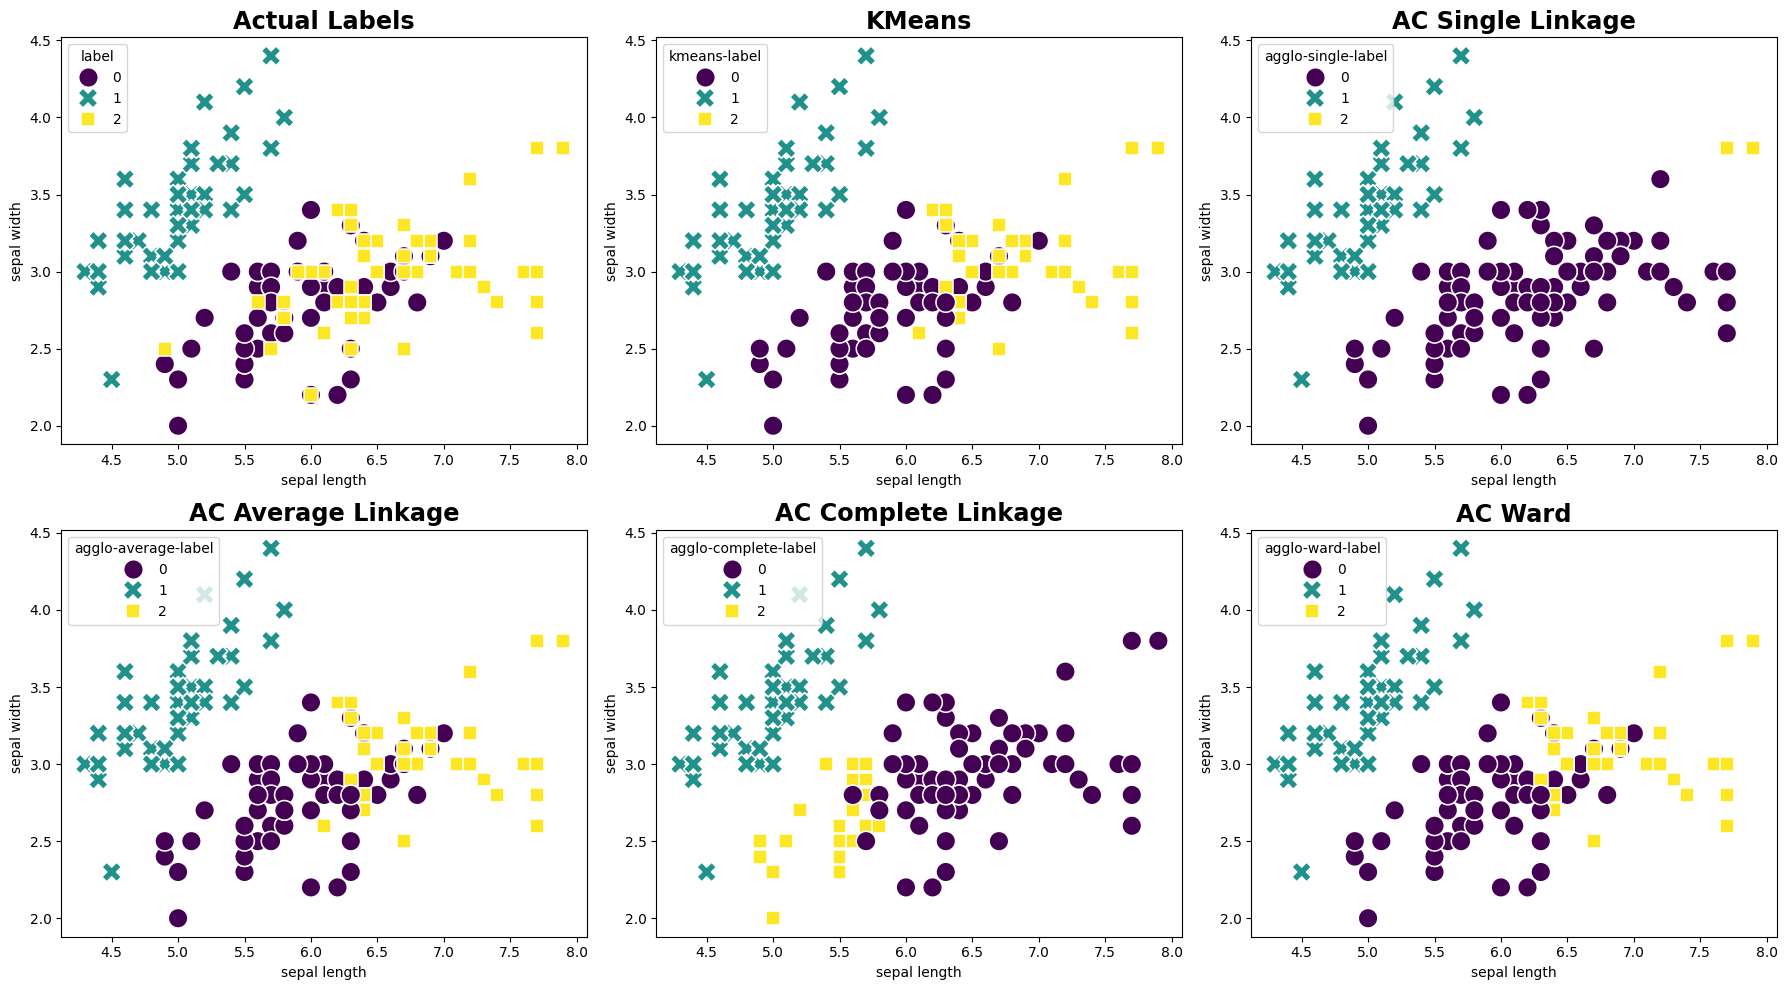

In [72]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot using actual labels
sns.scatterplot(ax=axes[0,0], data=data, x='sepal length', y='sepal width', hue='label', style='label', palette='viridis', s=200)
axes[0,0].set_title('Actual Labels')

# Plot using KMeans labels
sns.scatterplot(ax=axes[0,1], data=data, x='sepal length', y='sepal width', hue='kmeans-label', style='kmeans-label', palette='viridis', s=200)
axes[0,1].set_title('KMeans')

# Plot using Agglomerative clustering (AC) single linkage labels
sns.scatterplot(ax=axes[0,2], data=data, x='sepal length', y='sepal width', hue='agglo-single-label', style='agglo-single-label', palette='viridis', s=200)
axes[0,2].set_title('AC Single Linkage')

# Plot using Agglomerative clustering (AC) average linkage labels
sns.scatterplot(ax=axes[1,0], data=data, x='sepal length', y='sepal width', hue='agglo-average-label', style='agglo-average-label', palette='viridis', s=200)
axes[1,0].set_title('AC Average Linkage')

# Plot using Agglomerative clustering (AC) complete linkage labels
sns.scatterplot(ax=axes[1,1], data=data, x='sepal length', y='sepal width', hue='agglo-complete-label', style='agglo-complete-label', palette='viridis', s=200)
axes[1,1].set_title('AC Complete Linkage')

# Plot using Agglomerative clustering (AC) ward labels
sns.scatterplot(ax=axes[1,2], data=data, x='sepal length', y='sepal width', hue='agglo-ward-label', style='agglo-ward-label', palette='viridis', s=200)
axes[1,2].set_title('AC Ward')

plt.tight_layout()
plt.show()